Plotting the full time series...


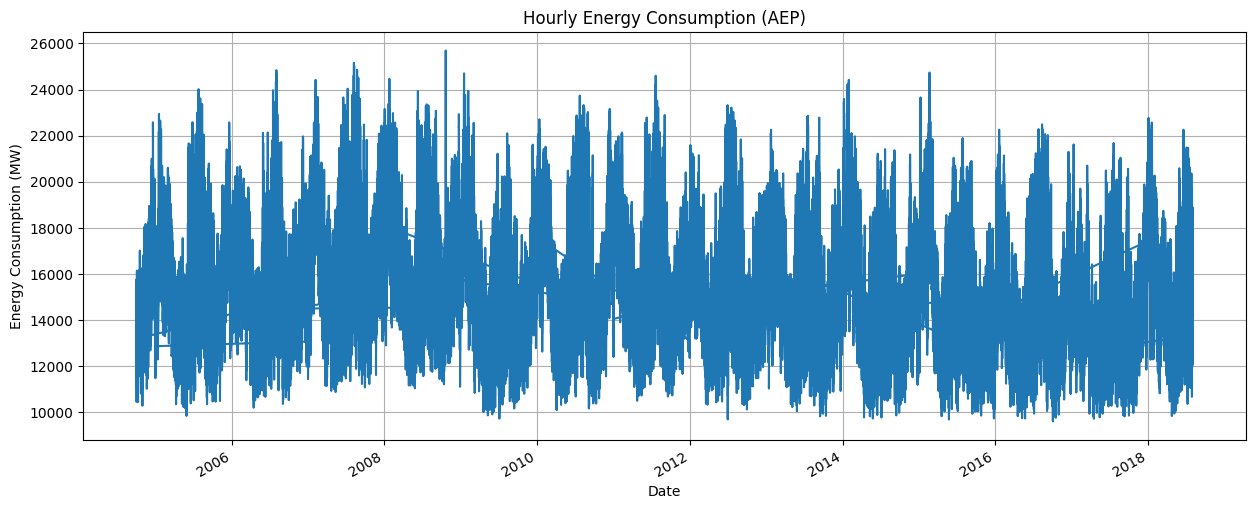

Plotting a one-year sample...


KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

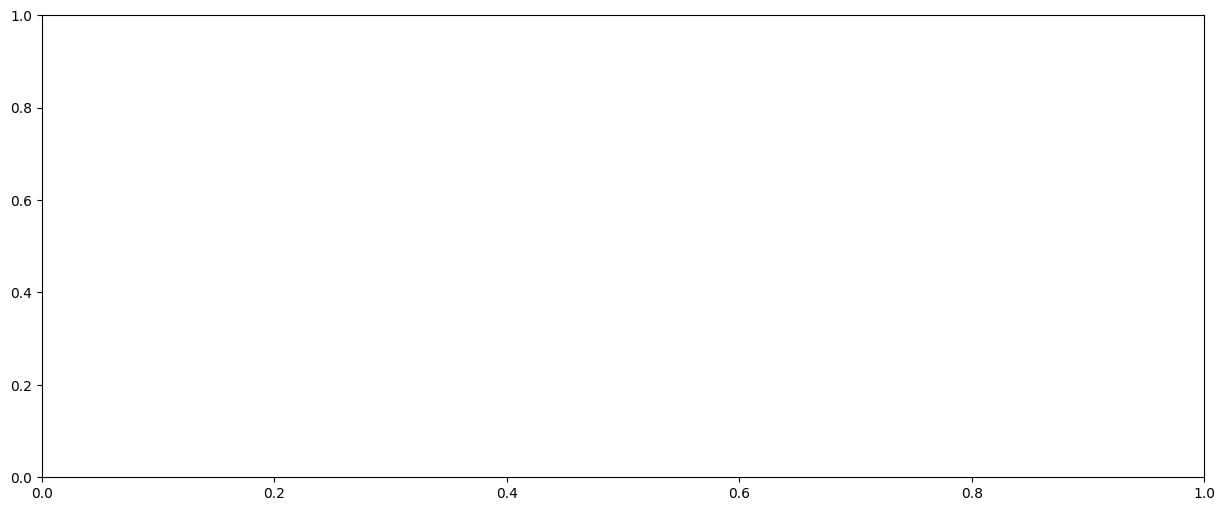

In [1]:
# In a Jupyter Notebook cell
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import os

# --- Load Processed Data ---
processed_file = '../data/processed/AEP_processed.csv'
df = pd.read_csv(processed_file, index_col='Datetime', parse_dates=True)
df.sort_index(inplace=True)
# --- 1. Visualize the Time Series ---
print("Plotting the full time series...")
fig, ax = plt.subplots(figsize=(15, 6))
df['AEP_MW'].plot(ax=ax, title='Hourly Energy Consumption (AEP)')
ax.set_xlabel('Date')
ax.set_ylabel('Energy Consumption (MW)')
plt.grid(True)
plt.savefig('../reports/figures/full_timeseries_plot.png')
plt.show()

# --- 2. Visualize a Sample Period (e.g., one year) ---
print("Plotting a one-year sample...")
fig, ax = plt.subplots(figsize=(15, 6))
df['AEP_MW'].loc['2017-01-01':'2017-12-31'].plot(ax=ax, title='Energy Consumption in 2017')
ax.set_xlabel('Date')
ax.set_ylabel('Energy Consumption (MW)')
plt.grid(True)
plt.savefig('../reports/figures/one_year_sample_plot.png')
plt.show()

# --- 3. Stationarity Check (Augmented Dickey-Fuller Test) ---
print("\nPerforming Augmented Dickey-Fuller test for stationarity...")
result = adfuller(df['AEP_MW'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
if result[1] <= 0.05:
    print("Conclusion: The series is likely stationary (reject H0).")
else:
    print("Conclusion: The series is likely non-stationary (fail to reject H0).")

# --- 4. Autocorrelation and Partial Autocorrelation Plots ---
print("\nPlotting ACF and PACF...")
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
plot_acf(df['AEP_MW'], lags=50, ax=ax1)
plot_pacf(df['AEP_MW'], lags=50, ax=ax2)
plt.savefig('../reports/figures/acf_pacf_plots.png')
plt.show()